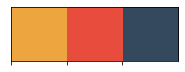

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

%matplotlib inline
#Color Palette for seaborn available at:
#https://python-graph-gallery.com/197-available-color-palettes-with-matplotlib/

mio = [ "#eda540","#e74c3c", "#34495e" ] #"#CBCAD3""#2a6b3e",  "#9a46c4"]
mine = sns.set_palette(mio)
sns.palplot(sns.color_palette())
my_cmap = ListedColormap(sns.color_palette(mio).as_hex())


from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

In [2]:
df = pd.read_excel(r'C:\Users\jfrank\OneDrive - Specialized Bicycle Components\Desktop\PrelimAnalysis.xlsx')
df.title.value_counts()

OPT B               18
YS-1 CHIN           18
EU3 3-18 w/ Clay     9
Evade 2 CE           9
EU3 3-18             9
Name: title, dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ForceAxial                      63 non-null     float64
 1   ForceSide                       63 non-null     float64
 2   Torque                          63 non-null     float64
 3   DynamicPressure                 63 non-null     float64
 4   RelativeHumidity                63 non-null     float64
 5   Temperature                     63 non-null     float64
 6   BarometricPressure              63 non-null     float64
 7   BodyDrag                        63 non-null     float64
 8   BodySide                        63 non-null     float64
 9   AirDensity                      63 non-null     float64
 10  AirSpeed                        63 non-null     float64
 11  BodyQ                           63 non-null     float64
 12  BodyCdA                         63 non

C:\Users\jfrank\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


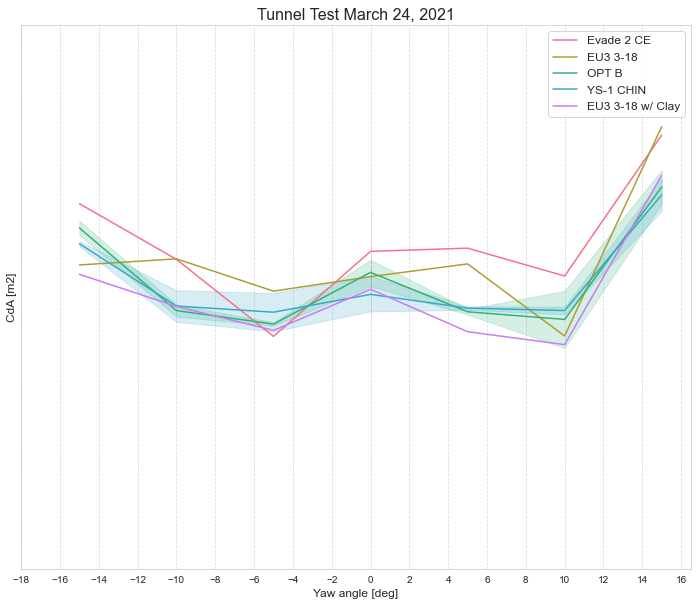

In [5]:
import matplotlib.ticker as ticker

sns.set_style("whitegrid", {'grid.linestyle': '--'})

#data = df[df['plot']=='yes']

data = df
plt.show()
fig, ax = plt.subplots(figsize = (12, 10))

sns.lineplot('yawAngle_deg', 'BodyCdA', data = data, hue = 'title', markers = True)
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.005))

# Major ticks every 20, minor ticks every 5
xmajor_ticks = np.arange(-18, 18, 2)
xminor_ticks = np.arange(0, 0.01, 5)
ymajor_ticks = np.arange(0.040, 0.07, 0.005)
yminor_ticks = np.arange(0.04, 0.07, 0.001)

plt.minorticks_on()
ax.set_xticks(xmajor_ticks)
#ax.set_xticks(xminor_ticks, minor=True)
ax.set_yticks(ymajor_ticks)
ax.set_yticks(yminor_ticks, minor=True)

# And a corresponding grid
ax.grid(which='both')

# Or if you want different settings for the grids:
ax.grid(which='minor', alpha=0.5)
ax.grid(which='major', alpha=0.7)

ax.set_ylim(0.300, 0.326)
ax.set_xlabel('Yaw angle [deg]', fontsize = 12)
ax.set_ylabel('CdA [m2]', fontsize = 12)
ax.set_title('Tunnel Test March 24, 2021', fontsize = 16)

ax.legend(fontsize = 12)

In [6]:
numbers = pd.DataFrame(data.groupby([ 'yawAngle_deg', 'title'])['BodyCdA'].mean().unstack())
numbers.to_csv('data.csv')

In [7]:
numbers

title         EU3 3-18  EU3 3-18 w/ Clay  Evade 2 CE     OPT B  YS-1 CHIN
yawAngle_deg                                                             
-15           0.314533          0.314086    0.317464  0.316301   0.315548
-10           0.314825          0.312547    0.314799  0.312351   0.312567
-5            0.313280          0.311403    0.311118  0.311705   0.312274
 0            0.313975          0.313370    0.315183  0.314178   0.313126
 5            0.314582          0.311340    0.315336  0.312293   0.312469
 10           0.311135          0.310722    0.314003  0.311928   0.312352
 15           0.321146          0.318817    0.320745  0.318261   0.317887

In [38]:
numbers['Ave_Aeroroad'] = (numbers[['Aeroroad CFR Disc Di2 410mm', 'Aeroroad CFR Disc Di2 430mm']].mean(axis=1))
#numbers['Ave_Venge'] = (numbers[['Venge', 'Venge repeat']].mean(axis=1))

numbers['Diff_to_Aeroroad'] =  numbers['SL7 420mm'] - numbers['Ave_Aeroroad']
numbers

title         Aeroroad 430mm + Rapide CLX  Aeroroad CFR Disc Di2 410mm  \
yawAngle_deg                                                             
-16                              0.050574                     0.049432   
-14                              0.050300                     0.051976   
-12                              0.049056                     0.053143   
-10                              0.051478                     0.053988   
-8                               0.054014                     0.053887   
-6                               0.054164                     0.055335   
-4                               0.056341                     0.056763   
-2                               0.057834                     0.058678   
 0                               0.058438                     0.059008   
 2                               0.058919                     0.059149   
 4                               0.058101                     0.058346   
 6                               0.057220                     0.057633   
 8                               0.056453                     0.058326   
 10                              0.054053                     0.057063   
 12                              0.053188                     0.056936   
 14                              0.053411                     0.056254   
 16                              0.056803                     0.056866   

title         Aeroroad CFR Disc Di2 430mm  SL7 420mm  Ave_Aeroroad  \
yawAngle_deg                                                         
-16                              0.049637   0.058936      0.049535   
-14                              0.052402   0.058174      0.052189   
-12                              0.052754   0.057968      0.052949   
-10                              0.053840   0.059978      0.053914   
-8                               0.054426   0.060938      0.054156   
-6                               0.054388   0.062607      0.054861   
-4                               0.056601   0.062395      0.056682   
-2                               0.057792   0.063779      0.058235   
 0                               0.058854   0.064065      0.058931   
 2                               0.059205   0.064927      0.059177   
 4                               0.058445   0.064435      0.058396   
 6                               0.056954   0.065832      0.057293   
 8                               0.058356   0.065015      0.058341   
 10                              0.056908   0.063487      0.056985   
 12                              0.056153   0.062456      0.056544   
 14                              0.056077   0.063654      0.056166   
 16                              0.055985   0.065371      0.056425   

title         Diff_to_Aeroroad  
yawAngle_deg                    
-16                   0.009401  
-14                   0.005985  
-12                   0.005020  
-10                   0.006064  
-8                    0.006782  
-6                    0.007746  
-4                    0.005713  
-2                    0.005544  
 0                    0.005135  
 2                    0.005750  
 4                    0.006040  
 6                    0.008539  
 8                    0.006674  
 10                   0.006502  
 12                   0.005912  
 14                   0.007488  
 16                   0.008946

In [39]:

numbers['wt'] =  [1.00, 1.31, 1.81, 2.51, 3.67, 5.02, 8.04, 15.07, 23.11, 15.07, 8.04, 5.02, 3.67, 2.51, 1.81, 1.31, 1.00]
numbers['wt'] /= 100

compare = numbers.iloc[[8,-4], -4:].round(4)
compare

title         SL7 420mm  Ave_Aeroroad  Diff_to_Aeroroad      wt
yawAngle_deg                                                   
0                0.0641        0.0589            0.0051  0.2311
10               0.0635        0.0570            0.0065  0.0251

In [40]:
#Simple Yaw average
print(compare['Ave_Aeroroad'].mean())
print(compare['SL7 420mm'].mean())
print(compare['Diff_to_Aeroroad'].mean())



0.05795
0.0638
0.0058


In [41]:
#Weighted Yaw average

print(((compare['Ave_Aeroroad']*compare['wt']).sum()/(compare['wt'].sum())).round(4))
print(((compare['SL7 420mm']*compare['wt']).sum()/(compare['wt'].sum())).round(4))
print(((compare['Diff_to_Aeroroad']*compare['wt']).sum()/(compare['wt'].sum())).round(4))


0.0587
0.064
0.0052


In [55]:
compare['Ave_Venge'].iloc[8]

0.06

In [58]:
# CFD: Weighted Yaw average

compare['cfd_wt'] = [0.86, 0.14]
print(((compare['Ave_Venge']*compare['cfd_wt']).sum()/(compare['cfd_wt'].sum())).round(4))
print(((compare['Ave_SL8']*compare['cfd_wt']).sum()/(compare['cfd_wt'].sum())).round(4))
print(((compare['Diff_to_Venge']*compare['cfd_wt']).sum()/(compare['cfd_wt'].sum())).round(4))



0.0597
0.0596
-0.0001
